In [280]:
import numpy as np
import matplotlib.pyplot as plt

In [281]:
#funcion punto 1 y 2 
def arbolBinomial(T,up,down,p,S0):
    dominio = np.arange(0,T,1)
    #N=1000
    N=10
    sum = np.zeros(len(dominio))
    
    for a in range(N):
        x = dominio
        y = [S0]
        visual = [S0]
        for i in range(1,len(x)):
            if np.random.binomial(1,p)==1:
                f = up  
                f_visual = 1          
            else :
                f=down
                f_visual = -1
            yi = y[i-1]*f
            #yi = y[i-1]+f
            vi_visual =  visual[i-1]+f_visual
            visual.append(vi_visual)
            y.append(yi)
        sum+=y

        plt.plot(x,visual,label='M_T={}'.format(round(y[-1],3)))
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

    avg = sum/N
    return avg

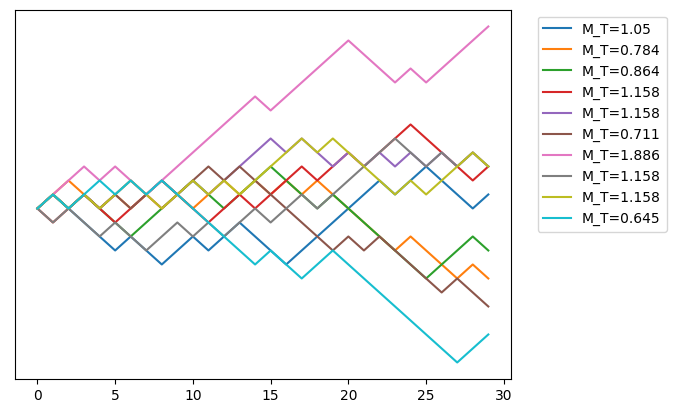

In [290]:
#punto1
p=0.5
up=1.05
#down=1/up
down = 1/up
T=30
S0 = 1
avg = arbolBinomial(T,up,down,p,S0)

0.7272727272727276


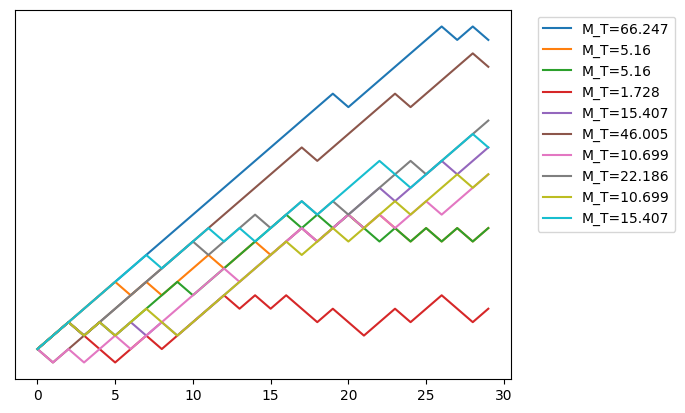

In [283]:
#punto2
r=0.10
up=1.20
down = 1/up
T=30
S0 = 1
p = (1+r-down)/(up-down)
print(p)
avg = arbolBinomial(T,up,down,p,S0)

In [284]:
#funcion punto3

def S(m,sigma,n):
    s = float(sigma)
    m = float(m)
    n = float(n)
    #print(s,m,n)
    return np.exp(s*m)*((2/(np.exp(s)+np.exp(-s)))**n)

def activoPorAB(T,up,down,p,S0,sigma):
    dominio = np.arange(0,T,1)
    #N=1000
    N=10
    sum = np.zeros(len(dominio))
    
    for a in range(N):
        x = dominio
        y = [S0]
        visual = [S0]
        for i in range(1,len(x)):
            if np.random.binomial(1,p)==1:
                f = up         
            else :
                f=down
            #yi = y[i-1]*f
            yi = y[i-1]*f
            vi_visual =  S(yi,sigma,i)
            visual.append(vi_visual)
            y.append(yi)
        sum+=y

        plt.plot(x,visual,label='S_T={}'.format(round(visual[T-1],3)))
    #plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    avg = sum/N
    return avg

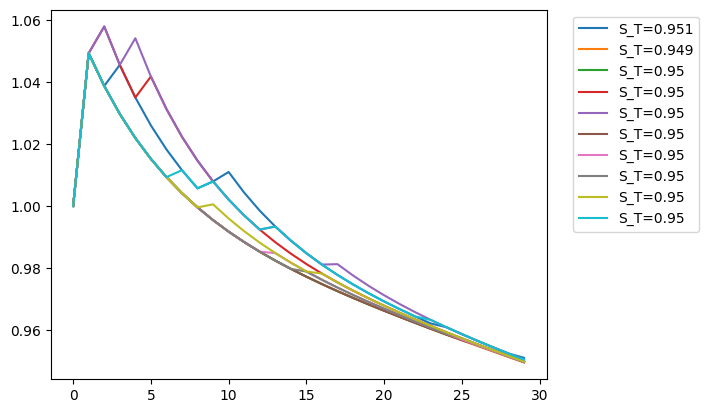

In [285]:
#punto 3: ejecutar con p=0.5
#punto 4: ejecutar con otro p
r=0.10
up=1.20
down = 1/up
T=30
S0 = 1
sigma = 0.06
p=0.1

avg = activoPorAB(T,up,down,p,S0,sigma)

In [286]:
#funcion punto 5
def arbolBinomialStop(T,up,down,p,S0,stopMin=None,stopMax=None):
    dominio = np.arange(0,T,1)
    probStop = 0.15
    #N=1000
    N=10
    sum = np.zeros(len(dominio))
    for a in range(N):
        stop = False
        stopTime = T
        x = dominio
        y = [S0]
        visual = [S0]
        for i in range(1,len(x)):
            if np.random.binomial(1,p)==1:
                f = up  
                f_visual = 1          
            else :
                f=down
                f_visual = -1

            #yi = y[i-1]*f
            yi = y[i-1]*f
            vi_visual =  visual[i-1]+f_visual
            if stop==True:
                yi = y[i-1]
                vi_visual = visual[i-1]
            else:
                if not stopMin==None:
                    if yi<= stopMin:
                        stop = True
                        stopTime = i

                if not stopMax==None:
                    if yi>= stopMax:
                        stop = True
                        stopTime = i


                if stopMin==None and stopMax==None:
                    if np.random.uniform()<=probStop:
                        stop = True
                        stopTime = i
            visual.append(vi_visual)
            y.append(yi)
        sum+=y
        plt.plot(x,visual,label='M_{}={}'.format(stopTime,round(y[T-1],3)))
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    avg = sum/N
    return avg

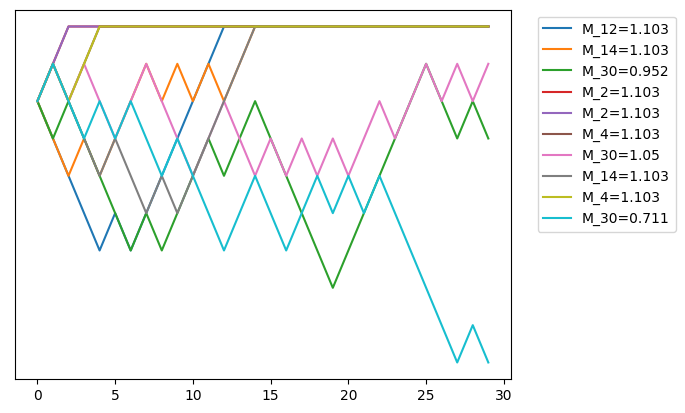

In [287]:
#punto5
p=0.5
up=1.05
#down=1/up
down = 1/up
T=30
S0 = 1
avg = arbolBinomialStop(T,up,down,p,S0,stopMax=1.1)
#stopMin=0.9,stopMax=1.1

In [326]:
#funcion punto 10
def arbolBinomialRISKFREE(T,up,down,p,S0,r,bringToPresentValue=False):
    dominio = np.arange(0,T,1)
    #N=1000
    N=10
    sum = np.zeros(len(dominio))
    
    for a in range(N):
        x = dominio
        y = [S0]
        PV_y = [S0]
        visual = [S0]
        for i in range(1,len(x)):
            if np.random.binomial(1,p)==1:
                f = up  
                f_visual = 1          
            else :
                f=down
                f_visual = -1
            yi = y[i-1]*f
            #yi = y[i-1]+f
            vi_visual =  visual[i-1]+f_visual
            visual.append(vi_visual)
            y.append(yi)
            PV_y.append(yi/((1+r)**i))
        

        if bringToPresentValue:
            plt.plot(x,visual,label='M_T={}'.format(round(PV_y[-1],3)))
            sum+=PV_y
        else:
            plt.plot(x,visual,label='M_T={}'.format(round(y[-1],3)))
            sum+=y
    rf = [S0]
    PV_rf = [S0]
    for i in range(1,len(x)):
        rf_i = rf[i-1]*(1+r) 
        rf.append(rf_i)
        PV_rf.append(rf_i/((1+r)**i))
    if bringToPresentValue:
        plt.plot(x,PV_rf,label='rf_T={}'.format(round(PV_rf[-1],3)),color="black")
    else:
        plt.plot(x,rf,label='rf_T={}'.format(round(rf[-1],3)),color="black")
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

    avg = sum/N
    return avg

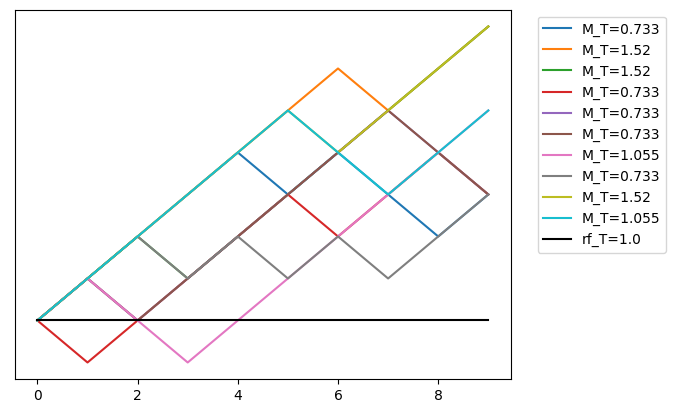

1.0333639924669549

In [371]:
#punto10

up=1.20
#down=1/up
down = 1/up
T=10
S0 = 1
r = 0.10
p = (1+r-down)/(up-down)
avg = arbolBinomialRISKFREE(T,up,down,p,S0,r,True)
avg[-1]

In [590]:
#funciones punto 7

def capitalizacion(T,up,down,p,S0,r,delta):
    dominio = np.arange(0,T,1)
    #N=1000
    N=10
    sum = np.zeros(len(dominio))
    
    for a in range(N):
        x = dominio
        y = [S0]
        visual = [S0]
        for i in range(1,len(x)):
            if np.random.binomial(1,p)==1:
                f = up         
            else :
                f=down
            #yi = y[i-1]*f
            yi = y[i-1]*f
            vi_visual =  delta[i-1]*yi+(1+r)*(visual[i-1]-delta[i-1]*y[i-1])
            if (visual[i-1]-delta[i-1]*y[i-1])<0:
                print("ALERTA: en el tiempo {}, el capital a invertir libre de riesgo es:{}".format(i,(visual[i-1]-delta[i-1]*y[i-1])))
            visual.append(vi_visual)
            y.append(yi)
        sum+=visual

        plt.plot(x,visual,label='X_T={}'.format(round(visual[T-1],3)))
    #plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    avg = sum/N
    return avg

ALERTA: en el tiempo 1, el capital a invertir libre de riesgo es:-2
ALERTA: en el tiempo 2, el capital a invertir libre de riesgo es:-2.04
ALERTA: en el tiempo 3, el capital a invertir libre de riesgo es:-2.0808
ALERTA: en el tiempo 4, el capital a invertir libre de riesgo es:-2.122416
ALERTA: en el tiempo 5, el capital a invertir libre de riesgo es:-2.16486432
ALERTA: en el tiempo 6, el capital a invertir libre de riesgo es:-2.2081616064
ALERTA: en el tiempo 7, el capital a invertir libre de riesgo es:-2.252324838528
ALERTA: en el tiempo 8, el capital a invertir libre de riesgo es:-2.29737133529856
ALERTA: en el tiempo 9, el capital a invertir libre de riesgo es:-2.3433187620045315
ALERTA: en el tiempo 10, el capital a invertir libre de riesgo es:-2.390185137244622
ALERTA: en el tiempo 11, el capital a invertir libre de riesgo es:-2.4379888399895147
ALERTA: en el tiempo 12, el capital a invertir libre de riesgo es:-2.486748616789305
ALERTA: en el tiempo 13, el capital a invertir libre

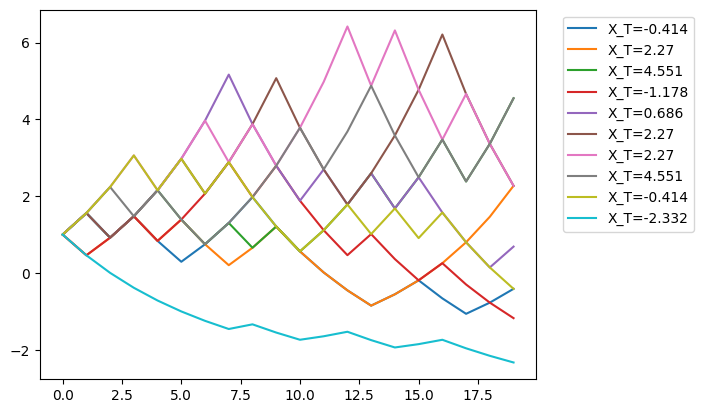

array([1.        , 1.23      , 1.22353333, 1.60799511, 1.47181161,
       1.67600167, 1.58830455, 1.93644916, 1.95139063, 1.95363536,
       1.56202157, 1.47867188, 1.52652767, 1.61192546, 1.58343475,
       1.55017982, 1.78926652, 1.31664477, 1.15026458, 1.22632278])

In [616]:
#punto 7
p=0.5
up=1.20
down = 1/up
T=20
S0 = 1
r = 0.02
delta = [3 for i in range(T)]
capitalizacion(T,up,down,p,S0,r,delta)

In [617]:
#funciones punto 8
def calcularAnterior(V1,V2,p,r):
    V = ((1-p)*V1+p*V2)/(1+r)
    #V = (V1+V2)/2
    return V

def calcularProcesoVn(layerFinal,p,r):
    #el orden de los layers va de menor a mayor
    layerFinal.sort()
    prevLayer = layerFinal
    layers = [layerFinal]
    while len(prevLayer) > 1:
        newLayer = []
        for i in range(1,len(prevLayer)):
            newLayer.append(calcularAnterior(prevLayer[i-1],prevLayer[i],p,r))
        layers.append(newLayer)
        prevLayer = newLayer
    layers.reverse()
    return layers

def mostrarArbol(layers,nombre):
    x = []
    y = []
    L = len(layers)
    for i in range(L):
        Li = len(layers[i])
        for j in range(Li):
            x.append(i)
            y.append(layers[i][j])

    
    plt.scatter(x,y,s=5,label=nombre)
    plt.xlabel("n")
    #plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    

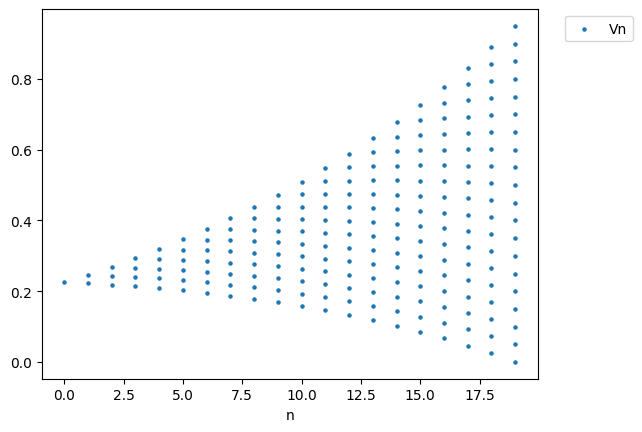

[[0.22545515142343833], [0.22213265445509292, 0.24681406050565882], [0.21818362948700243, 0.24385229177959092, 0.26952095407217946], [0.2135632702743365, 0.24025867905862858, 0.26695408784292063, 0.2936494966272126], [0.2082241885174781, 0.23598741365314185, 0.2637506387888056, 0.29151386392446926, 0.319277089060133], [0.20211627898763204, 0.23099003312872238, 0.2598637872698127, 0.2887375414109029, 0.3176112955519932, 0.3464850496930835], [0.19518657799377037, 0.2252152823005043, 0.25524398660723824, 0.2852726909139721, 0.315301395220706, 0.34533009952743987, 0.3753588038341738], [0.18737911487401954, 0.21860896735302285, 0.24983881983202613, 0.2810686723110294, 0.3122985247900326, 0.34352837726903585, 0.3747582297480391, 0.40598808222704236], [0.17863475617989866, 0.21111380275806205, 0.24359284933622544, 0.2760718959143889, 0.3085509424925523, 0.34102998907071563, 0.373509035648879, 0.4059880822270424, 0.4384671288052058], [0.16889104220644965, 0.20266925064773958, 0.236447459089029

In [618]:
#punto 8
T=20
layerFinal = [(i/T) for i in range(T)]

p = 0.5

r = 0.04

resultado = calcularProcesoVn(layerFinal,p,r)
mostrarArbol(resultado,"Vn")
#print(resultado)
print(resultado)

In [621]:
#funcion 9 : intento delta en vivo

def calcularDelta(Vu,Vd,Su,Sd):
    return (Vu-Vd)/(Su-Sd)


def capitalizacionDeltaHedging(T,up,down,p,S0,r,V):
    dominio = np.arange(0,T,1)
    #N=1000
    N=10
    sum = np.zeros(len(dominio))
    
    Vn_posibles = calcularProcesoVn(V,p,r)
    
    for a in range(N):
        x = dominio
        y = [S0]
        visual = [S0]
        escenario = [0,0]
        deltas = [1]
        for i in range(1,len(x)):
            escenario[0] = escenario[0] + 1
            if np.random.binomial(1,p)==1:
                f = up  
                escenario[1] = escenario[1] + 1   
            else :
                f=down
                escenario[1] = escenario[1]
            #yi = y[i-1]*f
            yi = y[i-1]*f

            #de hecho i deberia ser siempre igual a escenario[0]
            if (i+1) in range(0,len(x)):
                Vd = Vn_posibles[escenario[0]+1][escenario[1]]
                Vu = Vn_posibles[escenario[0]+1][escenario[1]+1]
                Su = yi*up
                Sd = yi*down
                delta = calcularDelta(Vu,Vd,Su,Sd)
                deltas.append(delta)
            vi_visual =  delta*yi+(1+r)*(visual[i-1]-delta*y[i-1])
            if (visual[i-1]-delta*y[i-1])<0:
                print("ALERTA: en el tiempo {}, el capital a invertir libre de riesgo es:{}".format(i,(visual[i-1]-delta[i-1]*y[i-1])))
            visual.append(vi_visual)
            y.append(yi)
        sum+=y

        plt.plot(x,visual,label='X_T={}'.format(round(visual[T-1],3)))
    #plt.yticks([])
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
    avg = sum/N
    return avg


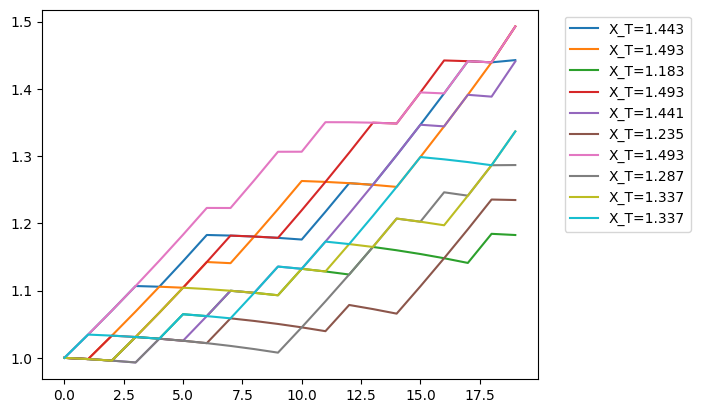

array([1.        , 0.94333333, 0.93522222, 0.99800741, 1.04258222,
       1.12190978, 1.19874235, 1.1203605 , 1.09009128, 1.12162141,
       1.09471577, 1.17442141, 1.1627877 , 1.14251661, 1.113091  ,
       1.26710066, 1.28596775, 1.359266  , 1.26348844, 1.38472896])

In [627]:
#punto 9
T=20
layerFinal = [i/T for i in range(T)]
p = 0.5
r = 0.02
S0 = 1
up = 1.20
down = 1/up

capitalizacionDeltaHedging(T,up,down,p,S0,r,layerFinal)
